<a href="https://colab.research.google.com/github/luisfelipe100/PCD/blob/main/PCD_Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea (10 puntos)

Requisitos
- Realizar un análisis estadístico sobre algún origen de datos textual (libros, publicaciones en redes sociales, entradas de blog, discursos políticos...) sobre dos o más fuentes de uno o más autores.

- Analizar estadística descriptiva básica, frecuencias, distribuciones de palabras, n-gramas, uso de signos de puntuación, emojis...

- Comparar las diversas fuentes y aventurar conclusiones a partir de los hallazgos en un reporte científico (de preferencia hecho en Latex; si no en Markdown como readme.md del repositorio).

- Sube a tu repositorio el código utilizado en tu tarea y el reporte en PDF (y TEX si aplica) en una carpeta claramente identificada.

In [1]:
import tweepy
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Autenticación con la API de Twitter
auth = tweepy.OAuth2BearerHandler("AAAAAAAAAAAAAAAAAAAAAKnbyAEAAAAA3jZyxD8geFMcp3uZ4wc0wNRAaLk%3DG3GC7AOzFWXXXXj8aVB4LVxQCFp4T22F6bBKRg8rI7NnX3r83x")
api = tweepy.API(auth)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
import tweepy
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Configura tus credenciales de API de Twitter
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAKnbyAEAAAAA3jZyxD8geFMcp3uZ4wc0wNRAaLk%3DG3GC7AOzFWXXXXj8aVB4LVxQCFp4T22F6bBKRg8rI7NnX3r83x"

# Autenticación con la API v2
client = tweepy.Client(bearer_token=BEARER_TOKEN)

def limpiar_texto(texto):
    """
    Limpia el texto eliminando enlaces, menciones, hashtags y caracteres especiales.
    """
    texto = re.sub(r"http\S+", "", texto)
    texto = re.sub(r"@\S+", "", texto)
    texto = re.sub(r"#\S+", "", texto)
    texto = re.sub(r"[^a-zA-ZáéíóúñÁÉÍÓÚÑ\s]", "", texto)
    texto = texto.lower()
    return texto

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Obtén el ID de usuario de la cuenta
user = client.get_user(username="Claudiashein")
user_id = user.data.id

# Obtén los últimos 100 tweets del usuario
tweets = client.get_users_tweets(
    id=user_id,
    max_results=100,
    tweet_fields=["text"]
)

# Extrae el texto de los tweets y límpialos
tweets_texto = [limpiar_texto(tweet.text) for tweet in tweets.data]

# Junta todos los tweets en un solo texto
texto_completo = " ".join(tweets_texto)

Número total de palabras: 1690
Top 10 palabras más frecuentes: [('del', 45), ('los', 42), ('que', 38), ('con', 37), ('para', 36), ('méxico', 34), ('pueblo', 28), ('las', 26), ('por', 20), ('nos', 16)]


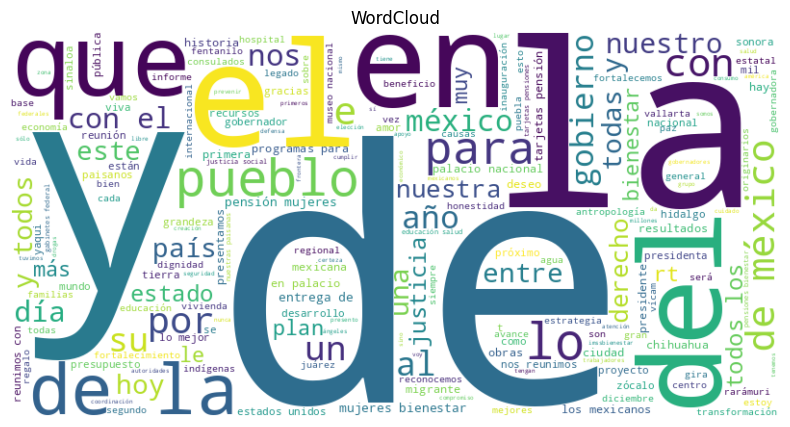

Top 10 bigramas más frecuentes: [(('todas', 'todos'), 9), (('del', 'pueblo'), 8), (('pueblo', 'méxico'), 8), (('todos', 'los'), 7), (('las', 'los'), 6), (('pensión', 'mujeres'), 6), (('mujeres', 'bienestar'), 6), (('entrega', 'tarjetas'), 6), (('palacio', 'nacional'), 5), (('los', 'mexicanos'), 5)]


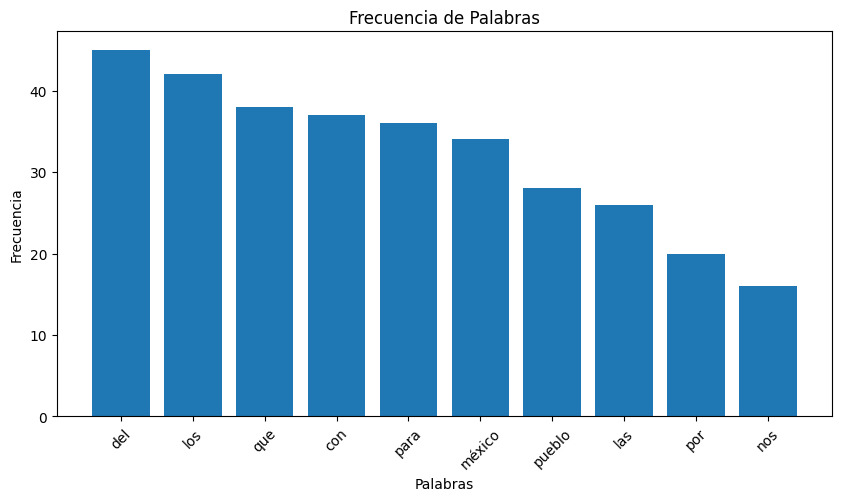

In [16]:
# # Tokeniza las palabras
palabras = re.findall(r'\b\w+\b', texto_completo.lower())

# Filtra palabras vacías
palabras = [palabra for palabra in palabras if len(palabra) > 2]

# Estadística descriptiva
print(f"Número total de palabras: {len(palabras)}")
print(f"Top 10 palabras más frecuentes: {Counter(palabras).most_common(10)}")

# Genera un wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_completo)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud")
plt.show()

# Crea n-gramas (bigramas como ejemplo)
bigramas = list(ngrams(palabras, 2))
contador_bigramas = Counter(bigramas)
print(f"Top 10 bigramas más frecuentes: {contador_bigramas.most_common(10)}")

# Histograma de frecuencias de palabras
frecuencias = Counter(palabras)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*frecuencias.most_common(10)))
plt.title("Frecuencia de Palabras")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Número total de palabras después de filtrar stopwords: 1266
Top 10 palabras más frecuentes: [('méxico', 34), ('pueblo', 28), ('bienestar', 15), ('gobierno', 14), ('mujeres', 13), ('nacional', 12), ('todas', 12), ('justicia', 10), ('año', 10), ('país', 9)]


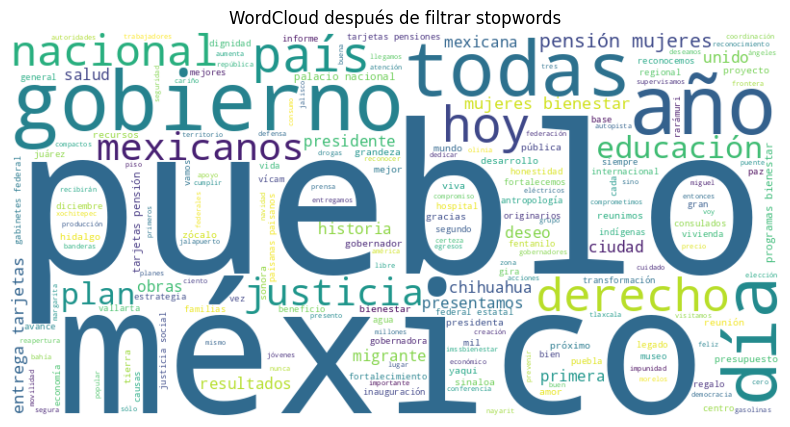

Top 10 bigramas más frecuentes: [(('pueblo', 'méxico'), 8), (('pensión', 'mujeres'), 6), (('mujeres', 'bienestar'), 6), (('entrega', 'tarjetas'), 6), (('palacio', 'nacional'), 5), (('programas', 'bienestar'), 5), (('tarjetas', 'pensión'), 5), (('todas', 'mexicanos'), 4), (('días', 'gobierno'), 4), (('museo', 'nacional'), 3)]


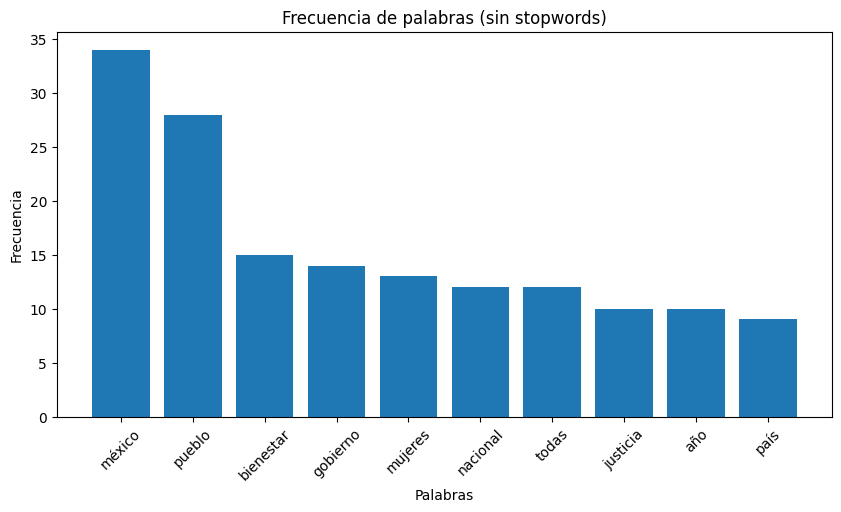

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams

# Asegúrate de descargar los recursos necesarios
nltk.download('punkt_tab')
nltk.download('stopwords')

# Obtén las stopwords en español
stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    """
    Limpia el texto eliminando enlaces, menciones, hashtags y caracteres especiales.
    """
    texto = re.sub(r"http\S+", "", texto)
    texto = re.sub(r"@\S+", "", texto)
    texto = re.sub(r"#\S+", "", texto)
    texto = re.sub(r"[^a-zA-ZáéíóúñÁÉÍÓÚÑ\s]", "", texto)
    texto = texto.lower()
    return texto

# Filtra palabras vacías y palabras cortas
def filtrar_palabras(palabras):
    return [palabra for palabra in palabras if palabra not in stop_words and len(palabra) > 2]

# Limpieza y tokenización del texto
texto_limpio = limpiar_texto(texto_completo)
palabras = word_tokenize(texto_limpio)

# Filtra las stopwords
palabras_filtradas = filtrar_palabras(palabras)

# Estadística descriptiva
print(f"Número total de palabras después de filtrar stopwords: {len(palabras_filtradas)}")
print(f"Top 10 palabras más frecuentes: {Counter(palabras_filtradas).most_common(10)}")

# Genera un wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(palabras_filtradas))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud después de filtrar stopwords")
plt.show()

# Crea n-gramas (bigramas como ejemplo)
bigramas = list(ngrams(palabras_filtradas, 2))
contador_bigramas = Counter(bigramas)
print(f"Top 10 bigramas más frecuentes: {contador_bigramas.most_common(10)}")

# Histograma de frecuencias de palabras
frecuencias = Counter(palabras_filtradas)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*frecuencias.most_common(10)))
plt.title("Frecuencia de palabras (sin stopwords)")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()
